In [ ]:
#Build a ML model to predict fraudulent transaction on the basis of credit card transactions information.
#PR curve
#SMOTE for resampling
#PCA
#time coloumn seems of no use


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')



In [ ]:
# data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


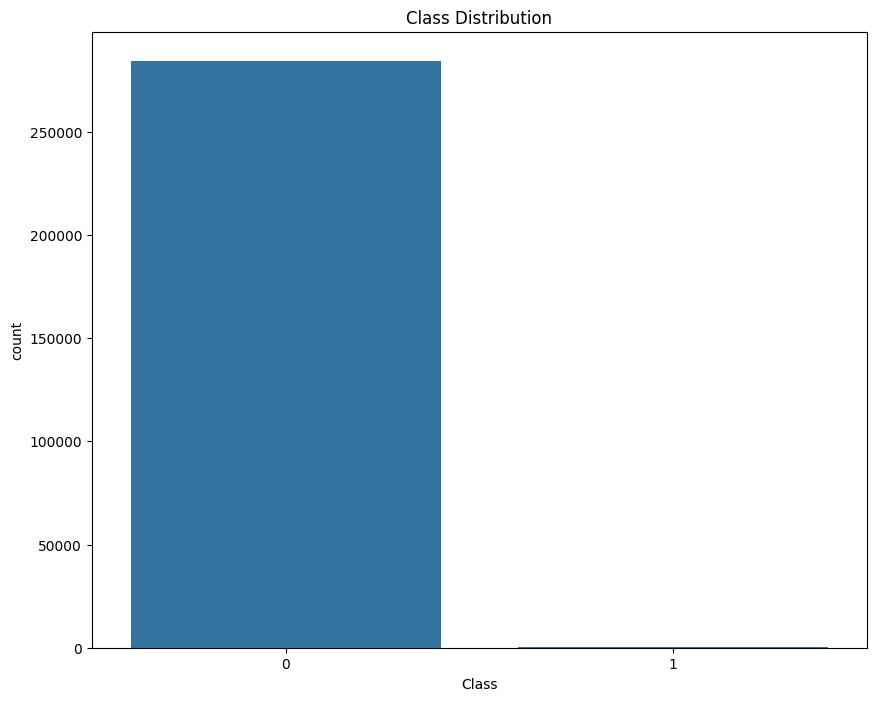

In [ ]:
# Bar graph for class distribution (assuming binary classification in the 'Class' column)
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


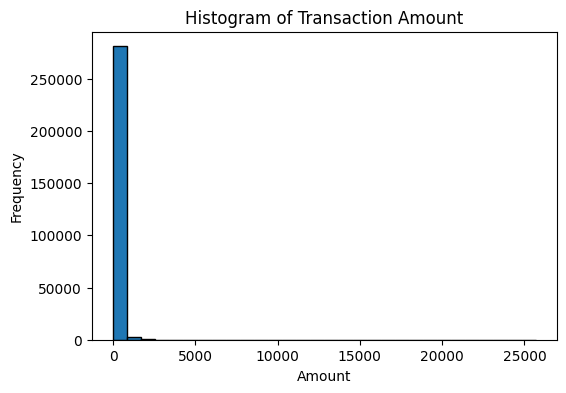

In [ ]:

# Histogram for a feature (for example, 'Amount')
plt.figure(figsize=(6, 4))
plt.hist(data['Amount'], bins=30, edgecolor='black')
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
col=data.columns

In [ ]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


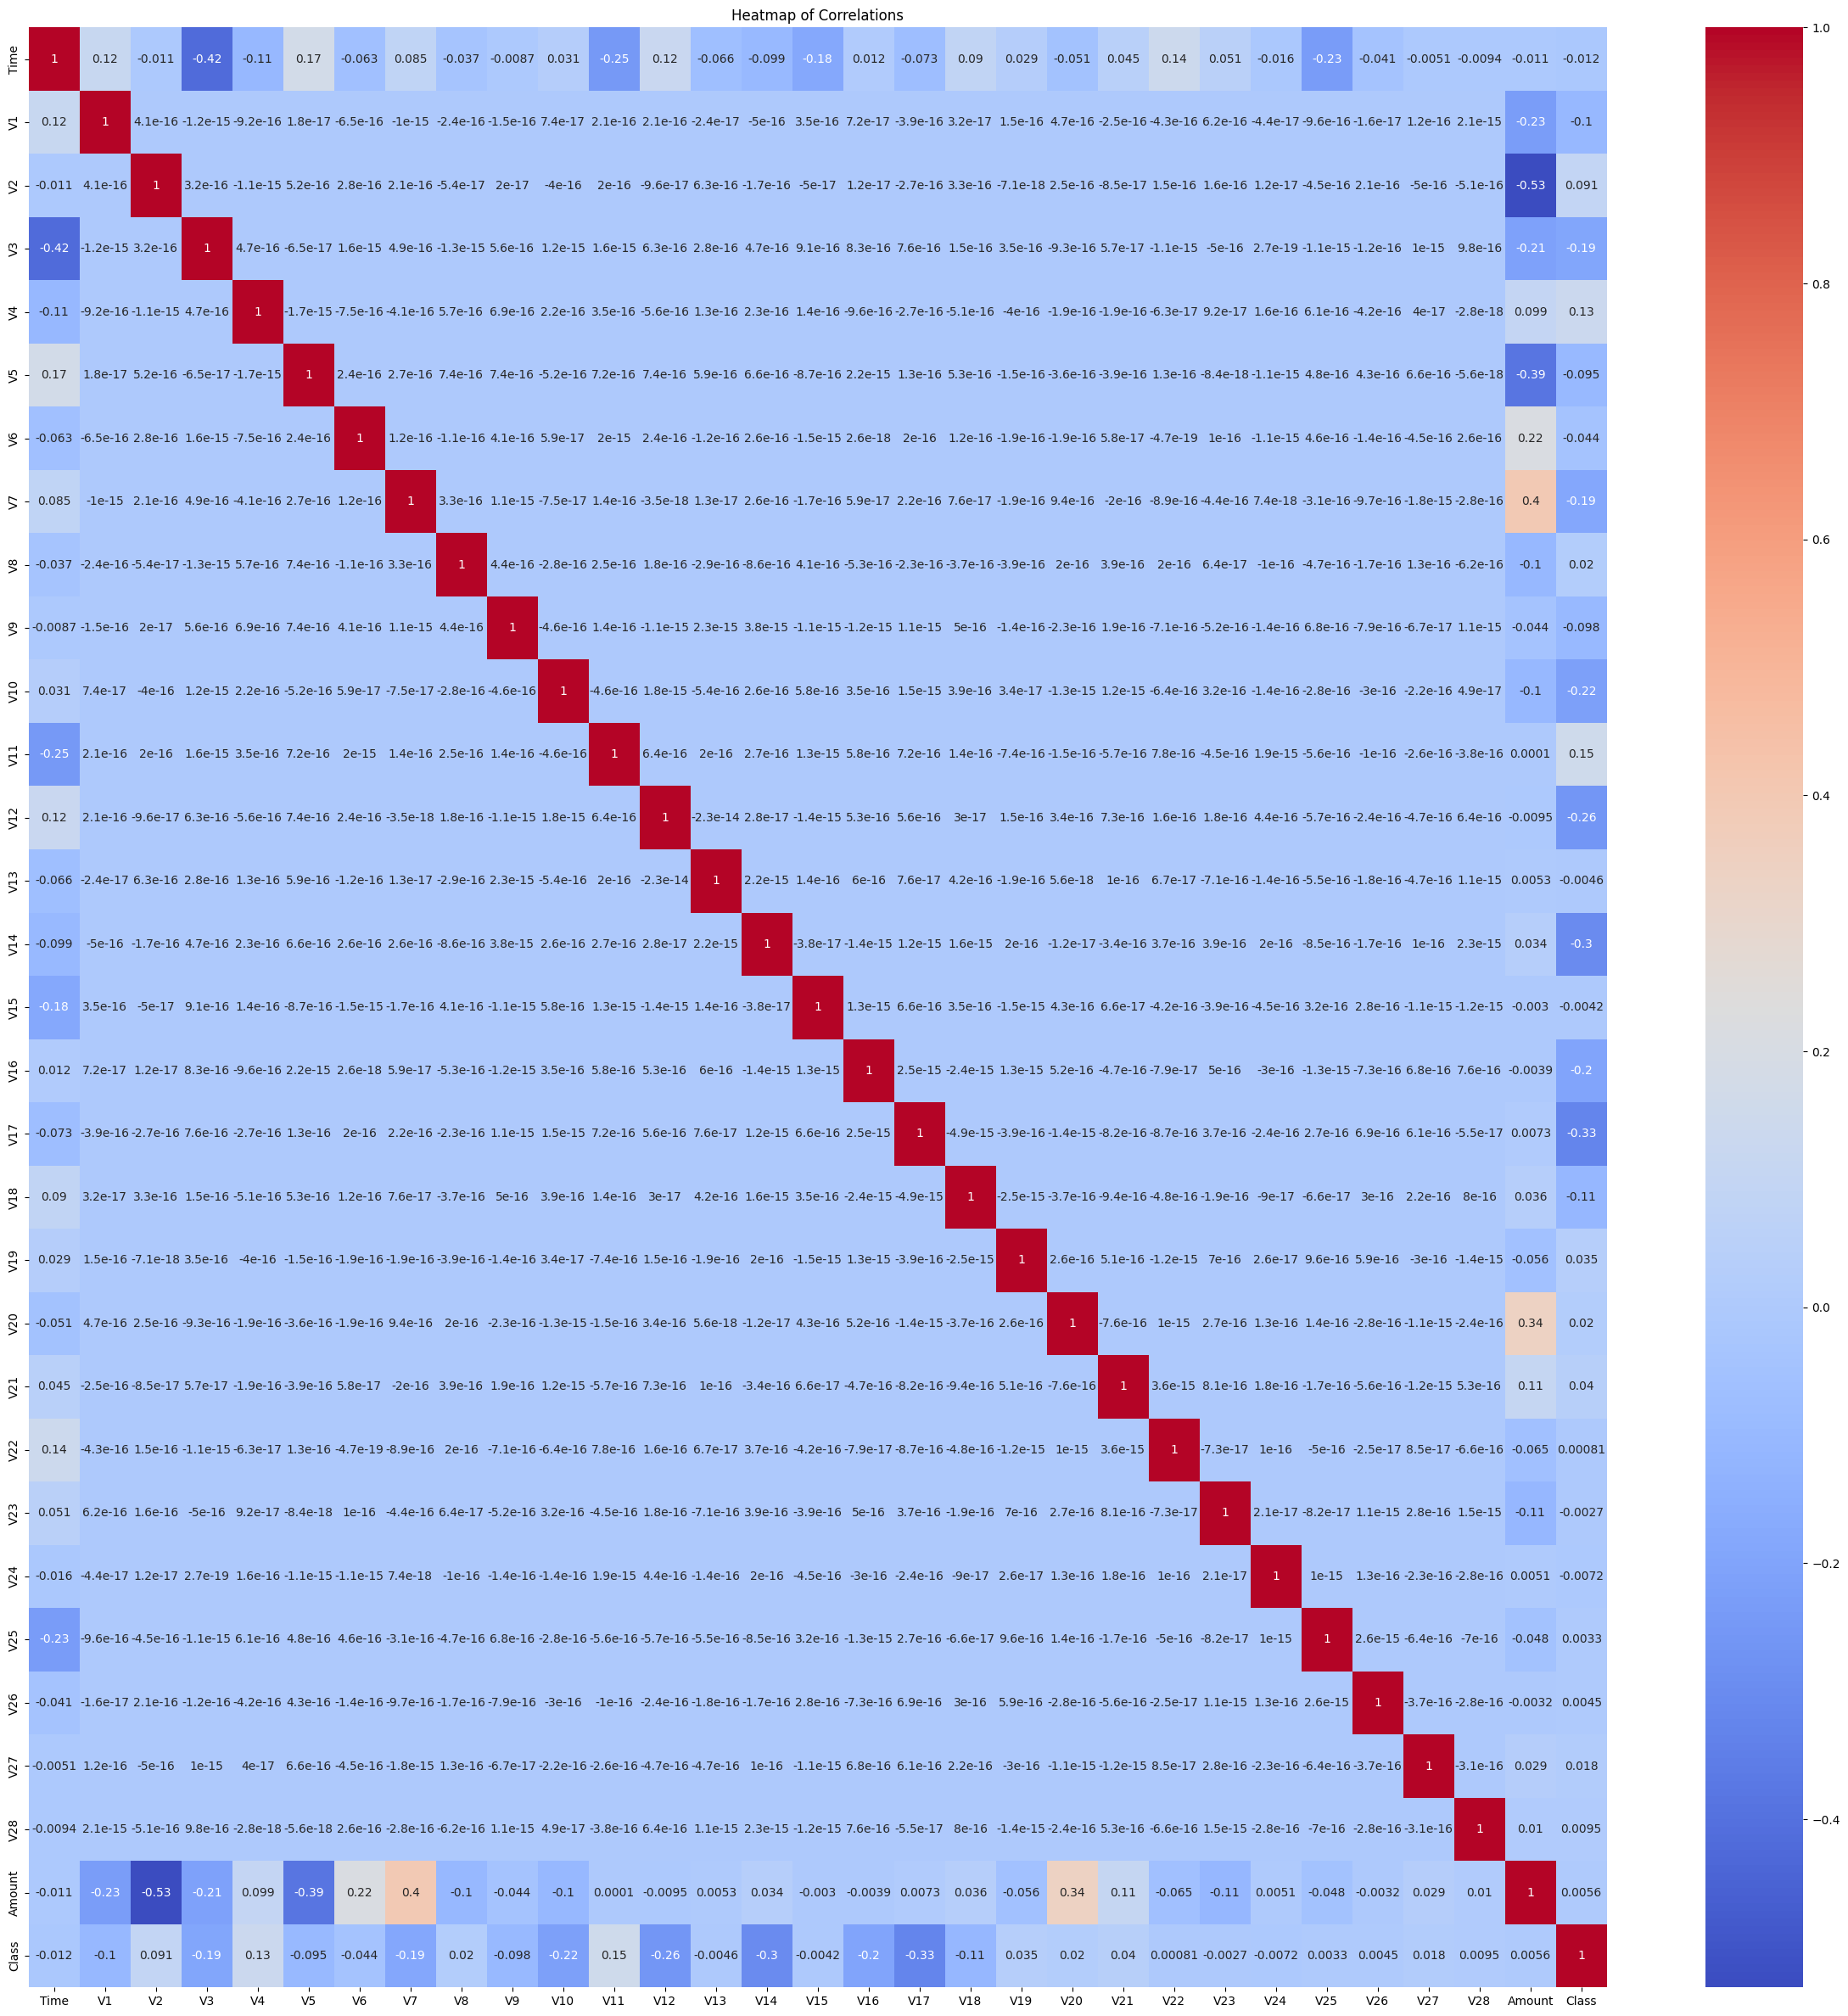

In [ ]:

# Heatmap for correlation between features
plt.figure(figsize=(30,30))
# plt.figure(figsize=(12, 8))
numeric_data = data.apply(pd.to_numeric, errors='coerce')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


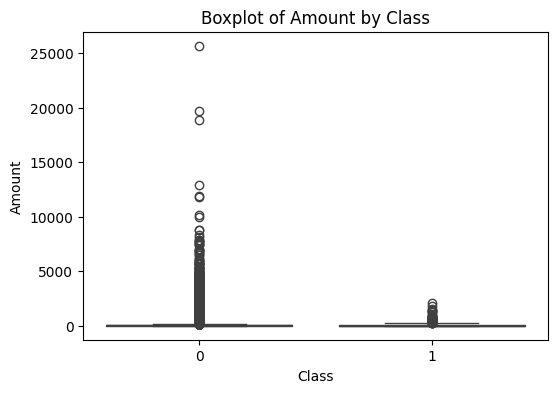

In [ ]:

# Boxplot for a feature (for example, 'Amount')
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()

In [ ]:
data = data[data['Amount'] <= 8000]

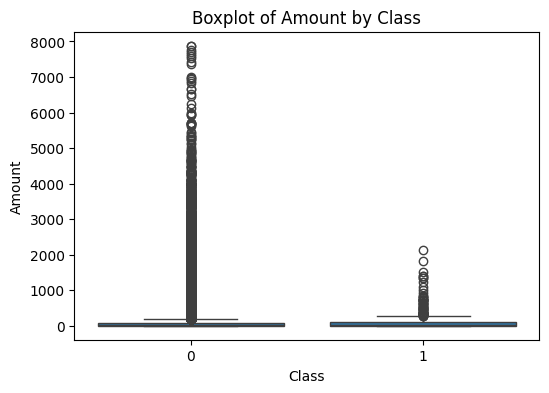

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()

In [ ]:
data.Class.value_counts()

,count
Class,
0,284303
1,492


In [ ]:
data=data.drop(['Time'],axis=1)

# **Train Test Data split**

In [ ]:
X=data[data.drop('Class',axis=1).columns]
y=data['Class' ]

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, y, test_size=0.33, random_state=42)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mdl=LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000,C=1,class_weight="balanced")

In [ ]:
mdl.fit(xtrain1,ytrain1)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [ ]:
probs=mdl.predict_proba(xtrain1)
threshold = 0.5
predictions = [1 if p[1] > threshold else 0 for p in probs]

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(ytrain1,predictions)
print("training accuracy")
print(accuracy,"\n")
print(confusion_matrix(ytrain1,predictions))
print(classification_report(ytrain1,predictions))

training accuracy
0.9769196905854978 

[[186080   4376]
 [    28    328]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    190456
           1       0.07      0.92      0.13       356

    accuracy                           0.98    190812
   macro avg       0.53      0.95      0.56    190812
weighted avg       1.00      0.98      0.99    190812



In [ ]:
probs=mdl.predict_proba(xtest1)
threshold = 0.6
predictions = [1 if p[1] > threshold else 0 for p in probs]

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(ytest1,predictions)
print(accuracy,"\n")
print(confusion_matrix(ytest1,predictions))
print(classification_report(ytest1,predictions))

0.9843056723024377 

[[92385  1462]
 [   13   123]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93847
           1       0.08      0.90      0.14       136

    accuracy                           0.98     93983
   macro avg       0.54      0.94      0.57     93983
weighted avg       1.00      0.98      0.99     93983



In [ ]:
probs=mdl.predict_proba(xtest1)
threshold = 0.5
prediction = [1 if p[1] > threshold else 0 for p in probs]

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(ytest1,prediction)
print(accuracy,"\n")
print(confusion_matrix(ytest1,prediction))
print(classification_report(ytest1,prediction))
# false negatives did not change when threshold was increased to 0.45 to 0.5
#seems to overfit the data
#LR with imbalanced data

0.9772937658938319 

[[91724  2123]
 [   11   125]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93847
           1       0.06      0.92      0.10       136

    accuracy                           0.98     93983
   macro avg       0.53      0.95      0.55     93983
weighted avg       1.00      0.98      0.99     93983



In [ ]:
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# accuracy=accuracy_score(ytest,predictions)
# print(accuracy,"\n")
# print(confusion_matrix(ytest,predictions))
# print(classification_report(ytest,predictions))

### **data balance**

In [ ]:
set=pd.concat([xtrain1,ytrain1],axis=1)

In [ ]:
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
sample=SMOTE()

In [ ]:
data_majority = set[set['Class'] == 0]
data_minority = set[set['Class'] == 1]

In [ ]:
data_majority_downsampled = resample(data_majority,replace=False,n_samples=100000,random_state=42)

In [ ]:
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

In [ ]:
x = data_downsampled.drop('Class', axis=1)
y = data_downsampled['Class']


In [ ]:
x, y = sample.fit_resample(x, y)

In [ ]:
x.shape,y.shape

((200000, 29), (200000,))

In [ ]:
y.value_counts()

,count
Class,
0,100000
1,100000


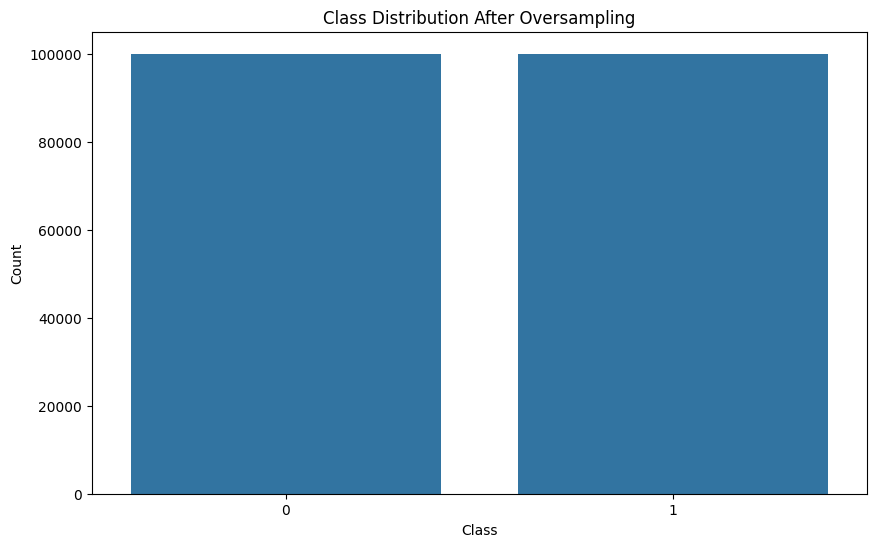

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
new_mdl=LogisticRegression(penalty='l2',solver='saga')
new_mdl.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(solver='saga')

In [ ]:
newprobs=new_mdl.predict_proba(xtest1)
threshold = 0.52
predictions = [1 if p[1] > threshold else 0 for p in newprobs]

accuracy=accuracy_score(ytest1,predictions)
print(accuracy,"\n")
print(confusion_matrix(ytest1,predictions))

0.9331900450081397 

[[87585  6262]
 [   17   119]]


In [ ]:
param_grid = {'C': [1, 10,15], 'solver': ['liblinear', 'saga']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(LogisticRegression(max_iter=2000), param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1)
randomized_search.fit(x, y)

best_model = randomized_search.best_estimator_
best_model.fit(x, y)

In [ ]:
newprobs=best_model.predict_proba(xtest1)
threshold = 0.35
predictions = [1 if p[1] > threshold else 0 for p in newprobs]

accuracy=accuracy_score(ytest1,predictions)
print(accuracy,"\n")
print(confusion_matrix(ytest1,predictions))
print(classification_report(ytest1,predictions))

In [ ]:
newprobs=best_model.predict_proba(xtest1)
threshold = 0.7
predictions1 = [1 if p[1] > threshold else 0 for p in newprobs]

accuracy=accuracy_score(ytest1,predictions1)
print(accuracy,"\n")
print(confusion_matrix(ytest1,predictions1))
print(classification_report(ytest1,predictions1))

In [ ]:
# accuracy=accuracy_score(ytest,predictions)
# print(accuracy,"\n")
# print(confusion_matrix(ytest,predictions))
# print(classification_report(ytest,predictions))

In [ ]:
cm = confusion_matrix(ytest1, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


precision, recall, _ = precision_recall_curve(ytest1, probs[:, 1])
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve (AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(ytest1, probs[:, 1])
roc_auc = roc_auc_score(ytest1, probs[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.',)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guess
plt.title("ROC Curve(AUC = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
